# Data Mining Assignment 2_NN

## Student Details

VIGNESH MANIKANDAN - 1002012757

## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load dataset_NN.csv dataset. [1 points]
* Pre-processing. [3 points]
* Select best 3 attributes for training and testing your model. [2 points]
* Find the best K using elbow method. [3 points]
* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]
* Use Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.[6 points]

In [178]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn import metrics

# loading  dataset
df_nn = pd.read_csv("dataset_NN.csv")

df_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [289]:
#print first 10 rows
df_nn.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [290]:
#Print last 10 rows
df_nn.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q


## Preprocessing
Finding null, replacing null with relevant data
Dropping irrelevant features from the data which are not used to predict to improve accuracy
Converting non-numerical features to binary form

In [181]:
df_nn.isnull().sum() #Checking number of null values in each column as part of preprocessing

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [182]:
#Find frequent value in Embarked attribute and fill the null values with most frequent value
#df_nn['Embarked'].mode()
df_nn.Embarked.fillna(df_nn.Embarked.mode()[0], inplace = True)

In [191]:
#Find Average of the age and fill the null values
df_nn['Age'] = df_nn['Age'].fillna(df_nn['Age'].median())

In [192]:
#Cabin has more than 80% data missing
#Name,Fare and TicketNo. attributes are irrelevant for prediction
#Dropping irrelevant data
df = df_nn.drop(['Name','Fare','Cabin','Ticket'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,S
887,1,1,0,19.0,0,0,S
888,0,3,0,28.0,1,2,S
889,1,1,1,26.0,0,0,C


In [193]:
#Converting characters to Binary form
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [200]:
#Now we should select the 3 best attributes
y = df.iloc[:,0]                  #Target Column
X = df.iloc[:,  df.columns != 'Survived']          #Independent columns

bestfeatures = SelectKBest(score_func=chi2, k =6).fit(X,y)         #Applying SelectKBest to get best features
df_score = pd.DataFrame(bestfeatures.scores_)
df_column = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 

feature_score = pd.concat([df_column,df_score],axis=1)
feature_score.columns = ['Attributes','Score']
#Print the score of attributes
print(feature_score.nlargest(3,'Score'))


  Attributes      Score
1        Sex  92.702447
0     Pclass  30.873699
2        Age  21.649163


Printing the clusters values using elbow method    Clusters            WSS
0         1  154120.417520
1         2   65011.481234
2         3   33009.574944
3         4   22045.351040
4         5   13556.400151
5         6    9625.501015
6         7    8142.874277
7         8    6910.402596
8         9    6152.656595




<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

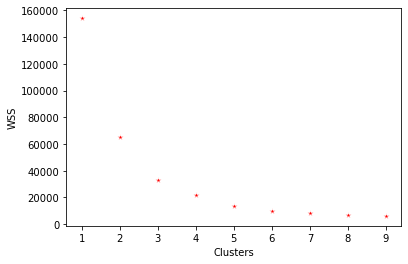

In [291]:
import sklearn.cluster as cluster

#Finding best k using 3 attributes using elbow method:
Best_dataK= df #creating a temporary variable 'Best_dataK'for calculating the best K. 
wss=[] 
for k in range(1,10):
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(Best_dataK)
    wss_iter=kmeans.inertia_ #for each k clusters it finds the plot of it.
    wss.append(wss_iter) # appending all k clusters one after the other.
   
AllCenters=pd.DataFrame({'Clusters' : M,'WSS' : wss}) #creating AllCenters dataframe with cluster count and plot value.
print("Printing the clusters values using elbow method",AllCenters)
print("\n")
sns.scatterplot(x='Clusters',y='WSS', data=AllCenters, marker ='*', color = 'red') #plotting graph.


Best K = 5   
Since the elbow is formed on 5

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_data = df.drop("Survived",axis=1)
y_data = df["Survived"].to_frame()
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state = 25)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#print(f"No. of testing examples: {X_train.shape[0]}")
#print(f"No. of testing examples: {X_test.shape[0]}")
#print(f"No. of testing examples: {y_train.shape[0]}")
#print(f"No. of testing examples: {y_test.shape[0]}")

No. of testing examples: 668
No. of testing examples: 223
No. of testing examples: 668
No. of testing examples: 223


In [222]:
# To calculate the Euclidean distance between the two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
        return sqrt(distance)

# to get similiar neighbors based on the distance between them, which is calculated using the euclidean distance measure
def get_neighbors_euclidean(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# classifier
def predict_classification_euclidean(train, test_row, num_neighbors):
    neighbors = get_neighbors_euclidean(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [267]:
# predicting using the K-nearest-neighbor algorithm and euclidean distance measure.
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()

    output = predict_classification_euclidean(train, test, num_neighbors)
    predictions.append(output)
    return(predictions)

In [270]:
k_Value_1=3
classifier1 = KNeighborsClassifier(n_neighbors=k_Value_1, metric='euclidean') 
classifier1.fit(X_train, np.ravel(y_train,order='C')) #training the mode
Y_pred = classifier1.predict(X_test)  #This predicts the test data values
print(Y_pred)
Accuracy1=classifier1.score(X_test,y_test) #To find the Accuracy Percentage.
Accuracy1 = "{0:.0f}%".format(Accuracy1 * 100)
print("\nAccuracy Percentage is :",Accuracy1) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0]


Accuracy Percentage is : 78%



classification report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       141
           1       0.74      0.63      0.68        82

    accuracy                           0.78       223
   macro avg       0.77      0.75      0.76       223
weighted avg       0.78      0.78      0.78       223

confusion matrix:
 [[123  18]
 [ 30  52]]

confusion matrix(Heat Map):
 AxesSubplot(0.125,0.125;0.62x0.755)


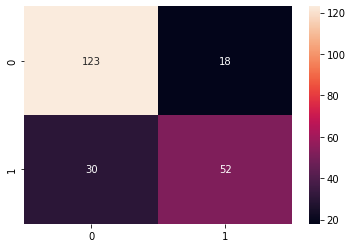

In [280]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cf=confusion_matrix(y_test, Y_pred)
print("\nclassification report:\n",classification_report(y_test, Y_pred))
print("confusion matrix:\n",confusion_matrix(y_test, Y_pred))
print("\nconfusion matrix(Heat Map):\n",sns.heatmap(cf, annot=True,fmt='d'))

In [286]:
k_Value_2=5
classifier2 = KNeighborsClassifier(n_neighbors=k_Value_2, metric='euclidean') 
classifier2.fit(X_train, np.ravel(y_train,order='C')) #training the mode
Y_pred = classifier2.predict(X_test) #This predicts the test data values
print(Y_pred)
Accuracy2=classifier2.score(X_test,y_test)#To find the Accuracy Percentage.
Accuracy2 = "{0:.0f}%".format(Accuracy2 * 100)
print("\nAccuracy Percentage is : ",Accuracy2) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0
 0]

Accuracy Percentage is :  78%



classification report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       141
           1       0.73      0.63      0.68        82

    accuracy                           0.78       223
   macro avg       0.77      0.75      0.76       223
weighted avg       0.78      0.78      0.78       223

confusion matrix:
 [[122  19]
 [ 30  52]]

confusion matrix(Heat Map):
 AxesSubplot(0.125,0.125;0.62x0.755)


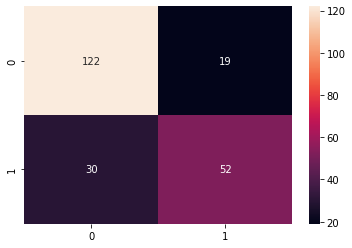

In [287]:
cf=confusion_matrix(y_test, Y_pred)
print("\nclassification report:\n",classification_report(y_test, Y_pred))
print("confusion matrix:\n",confusion_matrix(y_test, Y_pred))
print("\nconfusion matrix(Heat Map):\n",sns.heatmap(cf, annot=True,fmt='d'))

In [285]:
k_Value_3=6
classifier3 = KNeighborsClassifier(n_neighbors=k_Value_3, metric='euclidean') 
classifier3.fit(X_train, np.ravel(y_train,order='C')) #training the mode
Y_pred = classifier3.predict(X_test) #This predicts the test data values
print(Y_pred)
Accuracy3=classifier3.score(X_test,y_test)#To find the Accuracy Percentage.
Accuracy3 = "{0:.0f}%".format(Accuracy3 * 100)
print("\nAccuracy Percentage is : ",Accuracy3) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0]

Accuracy Percentage is :  78%



classification report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       141
           1       0.73      0.63      0.68        82

    accuracy                           0.78       223
   macro avg       0.77      0.75      0.76       223
weighted avg       0.78      0.78      0.78       223

confusion matrix:
 [[122  19]
 [ 30  52]]

confusion matrix(Heat Map):
 AxesSubplot(0.125,0.125;0.62x0.755)


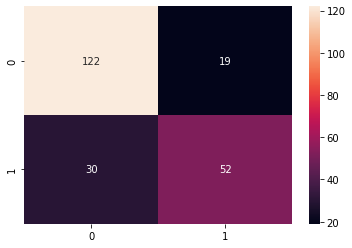

In [288]:
cf=confusion_matrix(y_test, Y_pred)
print("\nclassification report:\n",classification_report(y_test, Y_pred))
print("confusion matrix:\n",confusion_matrix(y_test, Y_pred))
print("\nconfusion matrix(Heat Map):\n",sns.heatmap(cf, annot=True,fmt='d'))

Text(0.5, 0, 'K - Value')

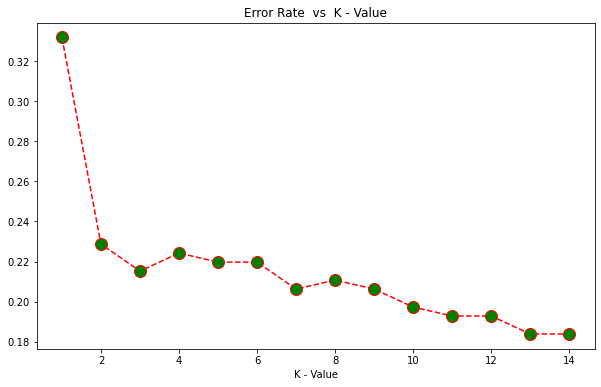

In [265]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#Error Rate vs K-Value
error_rate = []

for k in range(1,15):
    classifier = KNeighborsClassifier(n_neighbors=k) 
    classifier.fit(X_train,np.ravel(y_train,order='C'))
    prdct = classifier.predict(X_test)
    prdct=prdct.reshape(223,1)
    error_rate.append(np.mean(prdct != y_test,axis=0)) 
    
plt.figure(figsize = (10,6))
plt.plot(range(1,15),error_rate, color='red', linestyle='dashed', marker='o',markerfacecolor='green', markersize = 12)
plt.title('Error Rate  vs  K - Value')
plt.xlabel('K - Value')

References

https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6

https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm#

https://stackoverflow.com/questions/71492151/regarding-suppressing-the-warning-message

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html